## THE SPARKS FOUNDATION
### NAME: M YAMINI PRIYA
##### DATA SCIENCE AND BUSINESS ANALYTICS
### TASK7: STOCK MARKET PREDICTION USING NUMERICAL AND TEXTUAL ANALYSIS
##### OBJECTIVE: To create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices and sentimental analysis of news headlines.
### Stock Market Prediction using Numerical and Textual Analysis
##### Importing some required python libraries

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
df1=pd.read_csv("india-news-headlines.csv")

In [66]:
df1.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [67]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474714 entries, 0 to 474713
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   publish_date       474714 non-null  int64 
 1   headline_category  474714 non-null  object
 2   headline_text      474713 non-null  object
dtypes: int64(1), object(2)
memory usage: 10.9+ MB


In [68]:
df1.value_counts()

publish_date  headline_category    headline_text                         
20060812      unknown              New Article                               22
20070321      removed              Team India's Twenty20 initiation today    22
20061126      removed              Free Trade Area or yuan trap?             13
20061114      unknown              Quote Unquote                              9
20060814      unknown              New Article                                7
                                                                             ..
20021115      unknown              Mid-school meal scheme from January        1
                                   Message of peace through Kuchipudi         1
                                   Marathon on a heady morning                1
                                   Maran reaches Houston for treatment        1
20070514      world.rest-of-world  'Wild beast' of Taliban killed             1
Length: 471354, dtype: int64

In [69]:
df1.shape

(474714, 3)

Loading Textual data

In [70]:
df2=pd.read_csv("Combined_News_DJIA.csv")

In [71]:
df2.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

Loading Numerical data

In [72]:
df3=pd.read_csv("upload_DJIA_table.csv")

In [73]:
df3.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234


As the top news is from 1 to 25 we will combine them into one

In [74]:
#combine the top news headlines
headlines=[]
for row in range(0,len(df2.index)):
  headlines.append(''.join(str(x) for x in df2.iloc[row,2:27]))

In [75]:
headlines[1]

'b\'Why wont America and Nato help us? If they wont help us now, why did we help them in Iraq?\'b\'Bush puts foot down on Georgian conflict\'b"Jewish Georgian minister: Thanks to Israeli training, we\'re fending off Russia "b\'Georgian army flees in disarray as Russians advance - Gori abandoned to Russia without a shot fired\'b"Olympic opening ceremony fireworks \'faked\'"b\'What were the Mossad with fraudulent New Zealand Passports doing in Iraq?\'b\'Russia angered by Israeli military sale to Georgia\'b\'An American citizen living in S.Ossetia blames U.S. and Georgian leaders for the genocide of innocent people\'b\'Welcome To World War IV! Now In High Definition!\'b"Georgia\'s move, a mistake of monumental proportions "b\'Russia presses deeper into Georgia; U.S. says regime change is goal\'b\'Abhinav Bindra wins first ever Individual Olympic Gold Medal for India\'b\' U.S. ship heads for Arctic to define territory\'b\'Drivers in a Jerusalem taxi station threaten to quit rather than wor

Now we will clean the combined headline

In [76]:
import re
clean_headlines=[]
for i in range(0,len(headlines)):
  clean_headlines.append(re.sub("b[(')]+",'',headlines[i]))
  clean_headlines[i]=re.sub('b[(")]+','',clean_headlines[i])
  clean_headlines[i]=re.sub("\'",'',clean_headlines[i])

In [77]:
clean_headlines[i]

'A 117-year-old woman in Mexico City finally received her birth certificate, and died a few hours later. Trinidad Alvarez Lira had waited years for proof that she had been born in 1898.IMF chief backs Athens as permanent Olympic hostThe president of France says if Brexit won, so can Donald TrumpBritish Man Who Must Give Police 24 Hours Notice of Sex Threatens Hunger Strike: The man is the subject of a sexual risk order despite having never been convicted of a crime.100+ Nobel laureates urge Greenpeace to stop opposing GMOsBrazil: Huge spike in number of police killings in Rio ahead of OlympicsAustrias highest court annuls presidential election narrowly lost by right-wing candidate.Facebook wins privacy case, can track any Belgian it wants: Doesnt matter if Internet users are logged into Facebook or notSwitzerland denies Muslim girls citizenship after they refuse to swim with boys at school: The 12- and 14-year-old will no longer be considered for naturalised citizenship because they ha

In [79]:
#Add the clean headlines to the data set
df2['Combined_News']=clean_headlines

In [80]:
df2.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,Combined_News
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",Georgia downs two Russian warplanes as countri...
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",Why wont America and Nato help us? If they won...
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",Remember that adorable 9-year-old who sang at ...
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...,U.S. refuses Israel weapons to attack Iran: r...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P

In [81]:
print(df2.columns)

Index(['Date', 'Label', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7',
       'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15',
       'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23',
       'Top24', 'Top25', 'Combined_News'],
      dtype='object')


In [82]:
#checking for null values
df2.isnull().sum()

Date             0
Label            0
Top1             0
Top2             0
Top3             0
Top4             0
Top5             0
Top6             0
Top7             0
Top8             0
Top9             0
Top10            0
Top11            0
Top12            0
Top13            0
Top14            0
Top15            0
Top16            0
Top17            0
Top18            0
Top19            0
Top20            0
Top21            0
Top22            0
Top23            1
Top24            3
Top25            3
Combined_News    0
dtype: int64

In [83]:
all_headlines=''.join(df2['Combined_News'].str.lower())

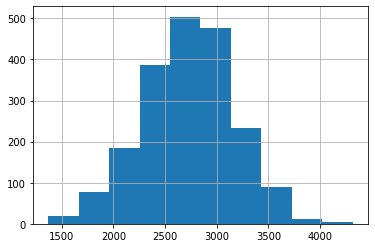

<Figure size 432x288 with 0 Axes>

In [84]:
df2['Combined_News'].str.len().hist()
plt.figure(figsize=(6,4))
plt.show()

Upload DJIA_table.csv

In [85]:
df3=pd.read_csv("upload_DJIA_table.csv")

In [86]:
df3.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234


In [87]:
df3.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1989.000000,1989.000000,1989.000000,1989.000000,1.989000e+03,1989.000000
mean,13459.116048,13541.303173,13372.931728,13463.032255,1.628110e+08,13463.032255
std,3143.281634,3136.271725,3150.420934,3144.006996,9.392343e+07,3144.006996
min,6547.009766,6709.609863,6469.950195,6547.049805,8.410000e+06,6547.049805
25%,10907.339844,11000.980469,10824.759766,10913.379883,1.000000e+08,10913.379883
50%,13022.049805,13088.110352,12953.129883,13025.580078,1.351700e+08,13025.580078
75%,16477.699219,16550.070312,16392.769531,16478.410156,1.926000e+08,16478.410156
max,18315.060547,18351.359375,18272.560547,18312.390625,6.749200e+08,18312.390625


In [88]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1989 non-null   object 
 1   Open       1989 non-null   float64
 2   High       1989 non-null   float64
 3   Low        1989 non-null   float64
 4   Close      1989 non-null   float64
 5   Volume     1989 non-null   int64  
 6   Adj Close  1989 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 108.9+ KB


In [89]:
#checking for null values
df3.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

Visualizing the dataset

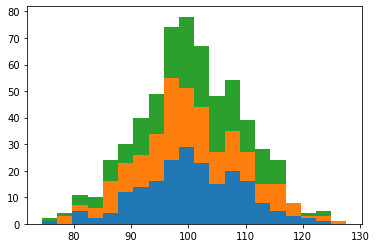

In [90]:
#stacked graph
import numpy as np
import matplotlib.pyplot as plt
a,b=100,10
x=a+b*np.random.randn(200,3)
n,bins,patches=plt.hist(x,20,stacked=True)
plt.show()

In [91]:
#splitting data into train and valid
train=df3[:700]
valid=df3[700:]

In [92]:
train.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234


In [93]:
training=train['Close']
validation=valid['Close']

In [94]:
training.head()

0    17949.369141
1    17929.990234
2    17694.679688
3    17409.720703
4    17140.240234
Name: Close, dtype: float64

Using Vader model for sentiment analysis

In [95]:
pip install vaderSentiment

In [96]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import re
import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

Splitting data into training and testing dataset

In [97]:
x=df3.drop('Date',axis=1)
y=df3['Date']

In [98]:
y.value_counts()

2016-07-01    1
2011-03-31    1
2011-03-14    1
2011-03-15    1
2011-03-16    1
             ..
2013-11-19    1
2013-11-20    1
2013-11-21    1
2013-11-22    1
2008-08-08    1
Name: Date, Length: 1989, dtype: int64

In [99]:
x.shape

(1989, 6)

In [100]:
y.shape

(1989,)

In [101]:
x.head()

,Open,High,Low,Close,Volume,Adj Close
0,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234


In [102]:
y.head()

0    2016-07-01
1    2016-06-30
2    2016-06-29
3    2016-06-28
4    2016-06-27
Name: Date, dtype: object

SVM method

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [105]:
from sklearn.svm import SVC
svclassifier=SVC(kernel='poly',degree=3,class_weight='balanced')
svclassifier.fit(x_train,y_train)

SVC(class_weight='balanced', kernel='poly')

In [106]:
y_pred=svclassifier.predict(x_test)

In [107]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [108]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

  2008-08-12       0.00      0.00      0.00       1.0
  2008-08-14       0.00      0.00      0.00       0.0
  2008-08-20       0.00      0.00      0.00       1.0
  2008-08-21       0.00      0.00      0.00       1.0
  2008-08-25       0.00      0.00      0.00       1.0
  2008-09-04       0.00      0.00      0.00       1.0
  2008-09-09       0.00      0.00      0.00       0.0
  2008-09-16       0.00      0.00      0.00       0.0
  2008-09-17       0.00      0.00      0.00       1.0
  2008-09-19       0.00      0.00      0.00       0.0
  2008-09-22       0.00      0.00      0.00       0.0
  2008-09-23       0.00      0.00      0.00       0.0
  2008-09-26       0.00      0.00      0.00       0.0
  2008-10-01       0.00      0.00      0.00       0.0
  2008-10-07       0.00      0.00      0.00       0.0
  2008-10-08       0.00      0.00      0.00       1.0
  2008-10-10       0.00      0.00      0.00       1.0
  2008-10-17       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1